In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scienceplots
plt.style.use(['science','grid','no-latex'])

In [2]:
data=np.loadtxt('data.txt',delimiter=',',unpack=True)
v = data[0]
f_obs = data[1]
f_res=data[2]
sig=data[3]
f_gal=data[4]

f_obs=f_obs-(f_res*1e-3)

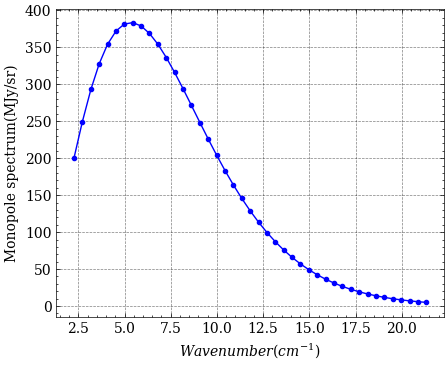

In [3]:
y_err=sig*1e-3
plt.figure(figsize=(5,4))
plt.errorbar(v,f_obs,y_err,ls='',color='k')
plt.plot(v,f_obs,'b.-')
plt.xlabel('$Wavenumber(cm^{-1})$')
plt.ylabel('Monopole spectrum(MJy/sr)')
#plt.plot(3e8/v,-v**2*f_th(v , 2.725),'r.-')
plt.show()

In [4]:
from scipy.constants import h,c,k
c=100*c
from scipy.optimize import curve_fit
def I(wave_num,T):
    return 2*np.pi*h*(wave_num)**3*c**2/(np.exp(h*c*(wave_num)/(k*T))-1)*1e13

T0=1
popt,pcov=curve_fit(I,v,f_obs,p0=[T0])
Tfit=popt[0]
Bfit=I(v,Tfit)

popt # T cmbr

array([2.76654759])

In [1]:
perr=np.sqrt(np.diag(pcov)) #error
perr

NameError: name 'np' is not defined

In [6]:
print('T = {:.3f} + {:.3f} K Blackbody'.format(Tfit, perr))

T = 2.767 + 0.002 K Blackbody


In [7]:
fit_label='T = {:.3f} ± {:.3f} K Blackbody'.format(Tfit, perr)

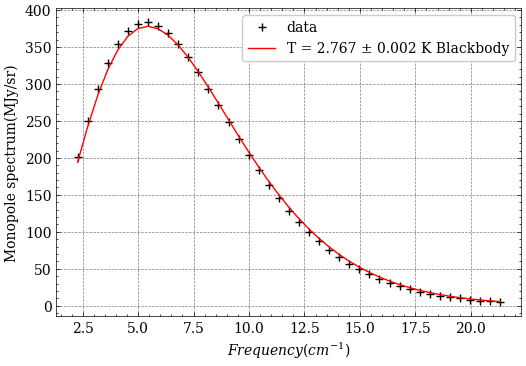

In [8]:
fig,ax=plt.subplots(figsize=(6,4))
ax.errorbar(v,f_obs,sig*1e-3,ls='',color='k'),
ax.plot(v,f_obs,'k+',label='data')
ax.plot(v,Bfit,'r-',label=fit_label)
plt.xlabel('$Frequency(cm^{-1})$')
plt.ylabel('Monopole spectrum(MJy/sr)')
plt.legend(loc='upper right')
plt.show()

In [39]:
f_gal=f_gal*1e-3
c=2.99792458*1e8
freq=c*v*100

def galactic_spec(n,T,frequency):
    return freq**n*I(v,T)*np.pi*1e-13

popt,pcov=curve_fit(galactic_spec,f_gal,v)


/home/soumadip/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [15]:
popt

array([7.09852384e+03, 1.00000000e+00])

In [71]:
def galac(n,v,T):
    freq=v*c*100
    return freq**n*I(v,T)*1e-29



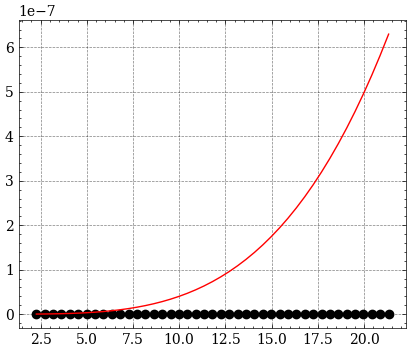

In [72]:
plt.figure(figsize=(5,4))
plt.plot(v,f_gal*1e-3,'ko')
plt.plot(v,galac(1.64,v,23.3),'r-')
plt.show()